In [1]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import copy
import numpy as np
from scipy.stats import kendalltau, norm
import shap
import matplotlib.pyplot as plt

import time
import datetime
import re
import os

c:\Users\uiv09218\AppData\Local\miniforge3\envs\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from xai_bench.base import BaseModel
from xai_bench.explainer.base_explainer import BaseExplainer, Explanation
from xai_bench.explainer.shap_explainer import ShapAdapter
from xai_bench.explainer.lime_explainer import LimeTabularAdapter
from xai_bench.models.random_forest import SKRandomForest

from xai_bench.datasets.heart_failure import Heart_Failure

In [3]:
dataset = Heart_Failure("../datasets/heart_failure.csv")

In [4]:
dataset.preprocess()

age  creatinine_phosphokinase  ejection_fraction     platelets  \
0    1.192945                  0.000166          -1.530560  1.681648e-02   
1   -0.491279                  7.514640          -0.007077  7.535660e-09   
2    0.350833                 -0.449939          -1.530560 -1.038073e+00   
3   -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4    0.350833                 -0.435486          -1.530560  6.517986e-01   
..        ...                       ...                ...           ...   
294  0.098199                 -0.537688          -0.007077 -1.109765e+00   
295 -0.491279                  1.278215          -0.007077  6.802472e-02   
296 -1.333392                  1.525979           1.854958  4.902082e+00   
297 -1.333392                  1.890398          -0.007077 -1.263389e+00   
298 -0.912335                 -0.398321           0.585389  1.348231e+00   

     serum_creatinine  serum_sodium      time  anaemia_0.0  anaemia_1.0  \
0            0.490057     -1.504036 -1.629502          1.0          0.0   
1           -0.284552     -0.141976 -1.603691          1.0          0.0   
2           -0.090900     -1.731046 -1.590785          1.0          0.0   
3            0.490057      0.085034 -1.590785          0.0          1.0   
4            1.264666     -4.682176 -1.577879          0.0          1.0   
..                ...           ...       ...          ...          ...   
294         -0.284552      1.447094  1.803451          1.0          0.0   
295         -0.187726      0.539054  1.816357          1.0          0.0   
296         -0.575031      0.312044  1.906697          1.0          0.0   
297          0.005926      0.766064  1.932509          1.0          0.0   
298          0.199578     -0.141976  1.997038          1.0          0.0   

     diabetes_0.0  diabetes_1.0  high_blood_pressure_0.0  \
0             1.0           0.0                      0.0   
1             1.0           0.0                      1.0   
2             1.0           0.0                      1.0   
3             1.0           0.0                      1.0   
4             0.0           1.0                      1.0   
..            ...           ...                      ...   
294           0.0           1.0                      0.0   
295           1.0           0.0                      1.0   
296           0.0           1.0                      1.0   
297           1.0           0.0                      1.0   
298           1.0           0.0                      1.0   

     high_blood_pressure_1.0  sex_0.0  sex_1.0  smoking_0.0  smoking_1.0  
0                        1.0      0.0      1.0          1.0          0.0  
1                        0.0      0.0      1.0          1.0          0.0  
2                        0.0      0.0      1.0          0.0          1.0  
3                        0.0      0.0      1.0          1.0          0.0  
4                        0.0      1.0      0.0          1.0          0.0  
..                       ...      ...      ...          ...          ...  
294                      1.0      0.0      1.0          0.0          1.0  
295                      0.0      1.0      0.0          1.0          0.0  
296                      0.0      1.0      0.0          1.0          0.0  
297                      0.0      0.0      1.0          0.0          1.0  
298                      0.0      0.0      1.0          0.0          1.0  

[299 rows x 17 columns]

In [5]:
model = SKRandomForest(
    task='classification'
)
model.fit(dataset.X_train_scaled.values, dataset.y_train.values)

In [6]:
shapExplainer = ShapAdapter(
    dataset
)
shapExplainer.fit(
    dataset.X_test_scaled.values,
    model,
    dataset.features
)

In [7]:
exps = shapExplainer.explain(
    dataset.X_test_scaled.values
)
exps

array([[-0.02640111, -0.01134915,  0.        ,  0.        , -0.00958326,
         0.        ,  0.        , -0.03526501, -0.02630585,  0.04879639,
         0.        ,  0.03338577],
       [ 0.00393103,  0.00882184,  0.        ,  0.        ,  0.        ,
         0.02059696, -0.02831333,  0.02896076,  0.01604078,  0.067437  ,
         0.01326254,  0.01587355],
       [-0.00646432,  0.        , -0.0073728 ,  0.        ,  0.        ,
         0.01484893, -0.00709932,  0.02100281, -0.02894972, -0.04676111,
        -0.02295647, -0.0196369 ],
       [-0.03666291,  0.        ,  0.        ,  0.        , -0.03407778,
        -0.00759974,  0.00930551, -0.14355026, -0.02143583,  0.        ,
        -0.03267332,  0.00663876],
       [ 0.00857632,  0.        ,  0.        , -0.0070369 ,  0.00222667,
         0.00400174,  0.        ,  0.01660069,  0.02677052,  0.02911489,
        -0.01573034,  0.00542085],
       [ 0.018456  ,  0.        ,  0.0046124 ,  0.        ,  0.        ,
         0.01610097,  

In [8]:
shapTestExplainer = ShapAdapter(
    dataset
)
shapTestExplainer.fit(
    dataset.X_full.values,
    model,
    dataset.features
)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [20]:
shapTestExplainer.explain(
    dataset.X_full.values
)

array([[ 0.        ,  0.        ,  0.00897193, ..., -0.00447471,
        -0.00345082,  0.09046181],
       [-0.00760966,  0.0043828 ,  0.        , ...,  0.01815773,
         0.0088353 , -0.00830857],
       [-0.00777729,  0.00118629,  0.        , ...,  0.01355941,
         0.00143098,  0.09031329],
       ...,
       [ 0.00422181, -0.01191626,  0.        , ...,  0.04122738,
         0.01174921,  0.05830742],
       [ 0.00399175,  0.01082346,  0.        , ...,  0.        ,
         0.01552794,  0.04548724],
       [ 0.01117479,  0.00318902,  0.00316171, ..., -0.0576128 ,
         0.        ,  0.03145576]], shape=(299, 12))

In [10]:
# Thread-safe parallel SHAP explanations using per-thread KernelExplainer instances and batching
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import threading

def _make_thread_local_explainer(shap_adapter: ShapAdapter):
    # Each thread will store its own KernelExplainer to avoid shared-state issues
    local = threading.local()
    def get_explainer():
        if getattr(local, 'explainer', None) is None:
            # Re-create the underlying shap explainer using the fitted background & model
            # We reuse the adapter's background and model prediction function but construct
            # a fresh KernelExplainer per thread to avoid internal index/state races.
            if shap_adapter._background is None or shap_adapter.model is None:
                raise RuntimeError('ShapAdapter must be fitted before creating thread-local explainers')
            def model_pred(X):
                if shap_adapter.model.task == 'classification':
                    probs = shap_adapter.model.predict_proba(np.asarray(X, dtype=float))
                    return probs.max(axis=1)
                else:
                    return np.asarray(shap_adapter.model.predict_scalar(np.asarray(X, dtype=float)), dtype=float)
            local.explainer = shap.KernelExplainer(model_pred, shap_adapter._background)
        return local.explainer
    return get_explainer

def parallel_explain_shap(shap_adapter: ShapAdapter, X: np.ndarray, n_workers: int = None, batch_size: int = 32):
    X = np.asarray(X, dtype=float)
    if X.ndim == 1:
        X = X.reshape(1, -1)
    n = X.shape[0]
    if n_workers is None:
        import os
        n_workers = max(1, os.cpu_count() or 1)

    # create batches to reduce per-call overhead
    batches = [X[i:i+batch_size] for i in range(0, n, batch_size)]

    get_explainer = _make_thread_local_explainer(shap_adapter)

    def _explain_batch(batch: np.ndarray) -> np.ndarray:
        expl = get_explainer()
        # call the thread-local KernelExplainer directly to avoid adapter-level shared state
        shap_vals = expl.shap_values(batch, nsamples=shap_adapter.nsamples, random_state=shap_adapter.random_state, silent=True)
        shap_vals = np.asarray(shap_vals)
        # use dataset helper to convert to final array format
        explanation_obj = Explanation(values=shap_vals, feature_names=shap_adapter.features.feature_names_model)
        return shap_adapter.dataset.explanation_to_array(explanation_obj)

    results = []
    with ThreadPoolExecutor(max_workers=n_workers) as ex:
        for res in ex.map(_explain_batch, batches):
            results.append(res)

    # stack batches back together
    results = [r if r.ndim == 2 else r.reshape(1, -1) for r in results]
    return np.vstack(results)

# Example usage:
# explanations = parallel_explain_shap(shapTestExplainer, dataset.X_full.values, n_workers=4, batch_size=16)
# print(explanations.shape)

In [17]:
# Thread-safe parallel SHAP explanations using per-thread KernelExplainer instances and batching
from concurrent.futures import ThreadPoolExecutor
import lime
import numpy as np
import threading

def _make_thread_local_explainer(lime_adapter: LimeTabularAdapter):
    # Each thread will store its own KernelExplainer to avoid shared-state issues
    local = threading.local()
    def get_explainer():
        if getattr(local, 'explainer', None) is None:
            # Re-create the underlying shap explainer using the fitted background & model
            # We reuse the adapter's background and model prediction function but construct
            # a fresh KernelExplainer per thread to avoid internal index/state races.
            if lime_adapter.reference_data is None or lime_adapter.features is None:
                raise RuntimeError('ShapLimeTabularAdapter must be fitted before creating thread-local explainers')
            local.explainer = lime.lime_tabular.LimeTabularExplainer(
                training_data=lime_adapter.reference_data,
                feature_names=lime_adapter.features.feature_names_model,
                mode=lime_adapter.model.task,
                discretize_continuous=False,
                random_state=lime_adapter.random_state,
            )
        return local.explainer
    return get_explainer

def parallel_explain_lime(lime_adapter: LimeTabularAdapter, X: np.ndarray, n_workers: int = None, batch_size: int = 32):
    X = np.asarray(X, dtype=float)
    if X.ndim == 1:
        X = X.reshape(1, -1)
    n = X.shape[0]
    if n_workers is None:
        import os
        n_workers = max(1, os.cpu_count() or 1)

    # create batches to reduce per-call overhead
    batches = [X[i:i+batch_size] for i in range(0, n, batch_size)]

    get_explainer = _make_thread_local_explainer(lime_adapter)

    def _explain_batch(batch: np.ndarray) -> np.ndarray:
        model_prediction = lime_adapter.model.predict(batch)
        expl = get_explainer()
        # call the thread-local KernelExplainer directly to avoid adapter-level shared state
        if expl.mode == 'classification':
            exps = [expl.explain_instance(
                data_row=x,
                predict_fn=lime_adapter.model.predict_proba,
                labels=lime_adapter.dataset.classes,
                num_features=x.shape[0],
                num_samples=lime_adapter.num_samples
            ) for x in batch]
        else:
            exps = [expl.explain_instance(
                data_row=x,
                predict_fn=lime_adapter.model.predict_scalar,
                num_features=x.shape[0],
                num_samples=lime_adapter.num_samples
            ) for x in batch]

        exp_values = []
        for i, exp in enumerate(exps):
            exp_values.append(list(dict(exp.as_list(model_prediction[i])).values()))
        exp_values = np.array(exp_values)

        # construct explanation object for compatibility with the dataset method
        explanation_object = Explanation(
            values=exp_values,
            feature_names=lime_adapter.features.feature_names_model
        )

        return lime_adapter.dataset.explanation_to_array(explanation_object)

    results = []
    with ThreadPoolExecutor(max_workers=n_workers) as ex:
        for res in ex.map(_explain_batch, batches):
            results.append(res)

    # stack batches back together
    results = [r if r.ndim == 2 else r.reshape(1, -1) for r in results]
    return np.vstack(results)

In [12]:
testExps = parallel_explain_shap(shapTestExplainer, dataset.X_full.values, n_workers=20, batch_size=16)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Usin

In [15]:
limeExplainer = LimeTabularAdapter(
    dataset
)
limeExplainer.fit(
    dataset.X_full.values,
    model,
    dataset.features
)

In [16]:
limeExp = limeExplainer.explain(
    dataset.X_full.values
)
limeExp

array([[-0.00069478,  0.00073537, -0.00067239, ...,  0.0244637 ,
        -0.01320456,  0.00861895],
       [ 0.01021006, -0.00034738, -0.00564605, ..., -0.01627118,
         0.01288006, -0.01200981],
       [ 0.01200628,  0.00024223,  0.00826768, ...,  0.01721771,
        -0.01329141, -0.00852891],
       ...,
       [-0.00140203, -0.00155204,  0.00641585, ...,  0.01526429,
        -0.00759907,  0.00711749],
       [-0.01206397,  0.00988847, -0.00812504, ...,  0.01722313,
         0.01520613, -0.00774101],
       [ 0.01205127,  0.00995408, -0.00646238, ..., -0.01567111,
         0.01177907, -0.01171684]], shape=(299, 12))

In [18]:
limeTestExplainer = LimeTabularAdapter(
    dataset
)
limeTestExplainer.fit(
    dataset.X_full.values,
    model,
    dataset.features
)

In [19]:
limeTestExps = parallel_explain_lime(limeTestExplainer, dataset.X_full.values, n_workers=16, batch_size=32)

---

def produce_explanations(
    explainer: shap.Explainer,
    dataset: np.ndarray
) -> np.ndarray:
    """
    Produces an array of explanation values for each instance of the given dataset using
    the provided explainer. The explanations are determined w.r.t. the class 1.

    Parameters
    ----------
    explainer : shap.Explainer
        A SHAP explainer object that can compute SHAP values for instances.

    dataset : np.ndarray
        A numpy array of shape (n_samples, n_features) containing the instances for 
        which local explanations are to be generated.

    Returns
    -------
    np.ndarray
        A 2D numpy array of shape (n_samples, n_features) where each row corresponds to
        the SHAP values for a single instance in the dataset.
    """
    assert isinstance(explainer, shap.Explainer)
    assert isinstance(dataset, np.ndarray)
    assert dataset.ndim == 2

    explanations = explainer(dataset).values[:, :, 1]

    return explanations

In [10]:
def manhattan_distance(
    vec1: np.ndarray,
    vec2: np.ndarray
) -> float:
    """
    Computes the Manhattan distance between two vectors.

    Args:
        vec1 (np.ndarray):
            A 1D numpy array representing the first vector of explanation importance values.

        vec2 (np.ndarray):
            A 1D numpy array representing the second vector of explanation importance values.

    Returns:
        float:
            The computed Manhattan distance between the two vectors.
    """
    assert isinstance(vec1, np.ndarray)
    assert isinstance(vec2, np.ndarray)
    assert vec1.shape == vec2.shape

    return np.sum(np.abs(vec1 - vec2), axis=-1)

In [11]:
def kendall_tau_distance(
    vec1: np.ndarray, 
    vec2: np.ndarray
) -> float:
    """
    Computes the ranking indices of the given vectors to sort them ascensingly and
    then calculates the Kendall Tau distance between the two rankings using the
    scipy.stats.kendalltau() function.
    Since the function returns a similarity score in the range [-1, 1], it is converted
    to a distance metric in the range [0, 1], i.e. [similar, unsimilar], by computing 
    (-tau + 1) / 2.

    Args:
        vec1 (np.ndarray):
            A 2D numpy array of shape (-1, n_features) holding the first vectors of explanation
            importance values with shape (n_features,) each.

        vec2 (np.ndarray):
            A 2D numpy array of shape (-1, n_features) holding the second vectors of explanation
            importance values with shape (n_features,) each.

    Returns:
        float:
            The normalized Kendall Tau distance between the two vectors.
    """
    assert isinstance(vec1, np.ndarray)
    assert isinstance(vec2, np.ndarray)
    assert vec1.ndim == 2
    assert vec1.shape == vec2.shape

    # produce rankings
    vec1_ranking = np.argsort(abs(vec1), axis=-1, stable=True)
    vec2_ranking = np.argsort(abs(vec2), axis=-1, stable=True)

    # compute kendall tau distance for each instance
    taus = np.array([
        kendalltau(ranking_1, ranking_2)[0]
        for ranking_1, ranking_2 in zip(vec1_ranking, vec2_ranking)             
    ])

    return (-taus + 1) / 2

In [12]:
def manipulation_loss(
    explanation_importance_values: tuple[np.ndarray, np.ndarray],
    distance_fn = None,
    order_ranking_fn = None,
    weights = (0.5, 0.5)
) -> float:
    """
    Produces a loss value based on a weighted combination of a distance function and an order ranking
    function. The functions are applied to the explanation importance values from an explainability 
    method evaluating a data instance before and after a manipulation.

    Args:
        explanation_importance_values (tuple):
            A tuple containing two elements:
            - The importance values before the manipulation attack for every data feature.
            - The importance values after the manipulation attack for every data feature.

        distance_fn (callable):
            A function that computes the distance between two vectors of explanation importance values,
            e.g., L1 or L2 distance. The distance value is transformed to a [0, 1] range before being 
            used in the final loss computation. 1 corresponds to maximum distance.

        order_ranking_fn (callable):
            A function that computes a ranking-based metric, e.g. Kendall Tau distance. This metric 
            should produce values in the interval [0;1].

        weights (tuple):
            A tuple containing two weights (w1, w2) that determine the contribution of the distance
            function and the order ranking function to the final loss value respectively.
    
    Returns:
        float:
            The computed manipulation loss value.
    """
    assert isinstance(explanation_importance_values, tuple)
    assert len(explanation_importance_values) == 2
    assert explanation_importance_values[0] is not None
    assert explanation_importance_values[1] is not None
    assert distance_fn is not None
    assert order_ranking_fn is not None
    assert len(weights) == 2
    assert all(isinstance(w, (int, float)) and 0 <= w for w in weights)

    # produce distance metrics in [0, infinity)
    explanation_distance = distance_fn(
        explanation_importance_values[0],
        explanation_importance_values[1]
    )

    # transform the distance to a [0, 1] range
    # with the assumption distance -> infinity => loss -> 1
    distance_transform = lambda x: 1 / (-x - 1) + 1
    explanation_distance = distance_transform(explanation_distance)

    # produce order ranking distance in [0, 1]
    order_ranking_distance = order_ranking_fn(
        explanation_importance_values[0],
        explanation_importance_values[1]
    )

    return weights[0] * explanation_distance + \
           weights[1] * order_ranking_distance

In [13]:
def explanation_drift(
    mutation_explanations: np.ndarray,
    reference_explanations: np.ndarray,
) -> np.ndarray:
    """
    Computes the explanation drift measure for a mutated individual based on the 
    manipulation loss between the explanation importance values before and after the mutation.
    The used distance function is the Manhattan distance and the order ranking function
    is the Kendall Tau distance.
    An explanation drift score close to 1 indicates that the mutation has significantly altered
    the explanations compared to the reference individual. A score close to 0 indicates that the
    explanations remain similar to the reference individual.

    Args:
        mutation_explanations (np.ndarray):
            A 2D numpy array of shape (n_samples, n_features) containing the explanation
            importance values for the mutated individual.

        reference_explanations (np.ndarray):
            A 2D numpy array of shape (n_samples, n_features) containing the explanation
            importance values for the reference individual.

    Returns:
        np.ndarray:
            A 1D numpy array of shape (n_samples,) containing the computed drift scores.
    """
    loss = manipulation_loss(
        explanation_importance_values = (
            mutation_explanations,
            reference_explanations
        ),
        distance_fn = manhattan_distance,
        order_ranking_fn = kendall_tau_distance,
        weights = (0.5, 0.5)
    )

    return loss

In [14]:
def LCB_Wilson(
    estimated_probability: np.ndarray,
    sample_size: np.ndarray,
    confidence: float = 0.95
) -> np.ndarray:
    """
    Computes the lower confidence bound using the Wilson score interval.

    Args:
        estimated_probability (np.ndarray):
            A 1D numpy array of shape (n_pop,) containing the estimated probabilities.

        sample_size (int):
            The total number of samples.

        confidence (float):
            The desired confidence level (between 0 and 1).

    Returns:
        np.ndarray:
            A 1D numpy array of shape (n_pop,) containing the computed lower confidence bounds.
    """
    assert isinstance(estimated_probability, np.ndarray)
    assert estimated_probability.ndim == 1
    assert isinstance(sample_size, np.ndarray)
    assert sample_size.ndim == 1
    assert estimated_probability.shape == sample_size.shape
    assert np.all(sample_size > 0)
    assert isinstance(confidence, float)
    assert 0 <= confidence <= 1

    # standard normal confidence interval z_{alpha/2}
    z = norm.ppf(1 - (1 - confidence) / 2)
    denominator = 1 + z**2 / sample_size
    adjusted_prob = estimated_probability + z**2 / (2 * sample_size)
    lcb = (
        adjusted_prob - \
        (z / (2 * sample_size)) * \
        np.sqrt(
            4 * sample_size * estimated_probability * \
            ( 1 - estimated_probability ) + z**2
        )
    ) / denominator

    return lcb

In [15]:
class Individual:
    """
    A class representing an individual of the evolutionary algorithm storing the standard
    deviations for each feature mutation, the mutation rate, and the data instances.
    """
    def __init__(
        self,
        data: np.ndarray,
        mutation_rate: float,
        mutation_stds: np.ndarray
    ):
        self.data = data
        self.mutation_rate = mutation_rate
        self.mutation_stds = mutation_stds

    def mutate(
        self,
        X_min: np.ndarray,
        X_max: np.ndarray,
        X_cat: list
    ):
        """
        Mutates the individual data instance by applying N(0, mutation_stds[i]) gaussian white
        noise mutations to each continuous feature and another categorical value to each 
        categorical feature with the individuals given mutation probability.
        The mutated data is clipped to the provided feature bounds.

        Args:
            X_min (np.ndarray):
                A 1D numpy array representing the minimum bounds for each feature.

            X_max (np.ndarray):
                A 1D numpy array representing the maximum bounds for each feature.

            X_cat (list):
                A list of numpy arrays representing the possible categories for a categorical
                feature or None if the feature is continuous. The length of the list should be
                equal to the number of features in the individual.
        """
        assert isinstance(X_min, np.ndarray)
        assert isinstance(X_max, np.ndarray)
        assert X_min.ndim == 1
        assert X_max.ndim == 1
        assert X_min.shape == X_max.shape
        assert X_min.shape[0] == self.data.shape[1]
        assert isinstance(X_cat, list)
        assert len(X_cat) == self.data.shape[1]
        assert all(isinstance(cat, np.ndarray) or cat is None for cat in X_cat)

        # create gaussian mutations with respective stds
        for feature in range(self.data.shape[1]):
            # decide which instances to mutate
            mutation_mask = np.random.rand(self.data.shape[0]) < self.mutation_rate

            # generate mutations with feature std
            mutations = np.random.normal(
                0,
                self.mutation_stds[feature],
                size=self.data.shape[0]
            )

            # categorical feature mutation
            if X_cat[feature] is not None:
                # map each continuous mutation value to the nearest category value
                indices = np.abs(mutations[:, None] - X_cat[feature][None, :]).argmin(axis=1)
                mutations = X_cat[feature][indices]

                # apply mutations according to the mask
                self.data[mutation_mask, feature] = mutations[mutation_mask]
            # continuous feature mutation
            else:
                # apply mutations according to the mask
                self.data[mutation_mask, feature] += mutations[mutation_mask]

        # clip the mutated data to the feature bounds
        self.data = np.clip(
            self.data,
            X_min,
            X_max
        )

In [16]:
def init_population(
    reference_data: np.ndarray,
    cat_mask: list = None,
    population_size: int = 50,
    mutation_rate: float = 0.1,
    initial_mutation_std: float = 0.3,
    individual_sample_size: int = 15,
) -> list[list[Individual]]:
    """
    Initilizes a population of n individuals by mutating copies of the provided reference data.

    Args:
        reference_data (np.ndarray):
            A numpy array of shape (n_samples, n_features) representing the reference data
            for the individuals to be mutated for the population initialization.

        cat_mask (list):
            A list of booleans indicating whether a feature is categorical (True) or continuous (False).

        n_population (int):
            The number of individuals to initialize the population with.

        initial_mutation_std (float):
            The initial mutation standard deviation to use for the individuals in the population.
            This rate is used to control the amount of mutation applied to each individual's data during
            initialization.

    Returns:
        list[list[Individual]]:
            A population of lists of Individual objects, where each list corresponds to an individual
            containing multiple samples. Each Individual has data of shape (n_samples, n_features) and 
            is mutated with the same mutation rate and mutation standard deviation.
    """
    assert isinstance(reference_data, np.ndarray)
    assert isinstance(cat_mask, list)
    assert len(cat_mask) == reference_data.shape[1]
    assert all(isinstance(is_cat, bool) for is_cat in cat_mask)
    assert isinstance(population_size, int)
    assert population_size > 0
    assert isinstance(mutation_rate, float)
    assert 0 < mutation_rate <= 1
    assert isinstance(initial_mutation_std, float)
    assert 0 <= initial_mutation_std <= 1
    assert isinstance(individual_sample_size, int)
    assert individual_sample_size > 0

    population = []

    # determine random mutation stds for each individual
    mutation_stds = np.abs(np.random.normal(
        loc=initial_mutation_std,
        scale=0.015,
        size=(population_size, reference_data.shape[1])
    ))

    for i in range(population_size):
        individual_list = []

        for _ in range(individual_sample_size):
            individual_data = reference_data.copy()
            individual = Individual(
                data = individual_data,
                mutation_rate = mutation_rate,
                mutation_stds = mutation_stds[i]
            )
            individual.mutate(
                X_min = reference_data.min(axis=0),
                X_max = reference_data.max(axis=0),
                X_cat = [
                    np.unique(reference_data[:, feature]) if (
                        cat_mask[feature]
                    ) else (
                        None
                    ) for feature in range(reference_data.shape[1])
                ]
            )

            individual_list.append(individual)

        population.append(individual_list)

    return population

In [17]:
def estimate_probability(
    drift_scores: np.ndarray,
    valid_mask: np.ndarray,
    threshold: float = 0.3
) -> np.ndarray:
    """
    Estimates the probability that the drift scores exceed the given threshold for all valid
    entries in the drift score array identified by the valid_mask.

    Args:
        drift_scores (np.ndarray):
            A 2D numpy array of shape (n_population, n_samples) containing the globalized drift score
            for each sample of mutation standard deviations in the population. 

        valid_mask (np.ndarray):
            A 2D numpy array of shape (n_population, n_samples) containing boolean values that indicate
            whether the corresponding drift score entry is valid (True) or invalid (False).

        threshold (float):
            A float value representing the threshold to compare the drift scores against to evaluate
            Probability(drift_score >= threshold).

    Returns:
        np.ndarray:
            A 1D numpy array of shape (n_population,) containing the estimated probabilities
            for each individual in the population. 
    """
    assert isinstance(drift_scores, np.ndarray)
    assert drift_scores.ndim == 2
    assert isinstance(valid_mask, np.ndarray)
    assert all(isinstance(mask_entry, (bool, np.bool_)) for mask_entry in valid_mask.flatten())
    assert valid_mask.shape == drift_scores.shape
    assert isinstance(threshold, float)
    assert 0 < threshold

    # amount valid drift score entries
    valid_drift_scores_amount = np.sum(valid_mask, axis=-1)

    # cummulate the amount of valid drift scores that exceed the threshold
    exceeding_drift_scores_amount = np.sum(
        (drift_scores * valid_mask) >= threshold,
        axis=-1
    )

    # compute the estimated probabilities
    return exceeding_drift_scores_amount / valid_drift_scores_amount

In [18]:
def population_fitness(
    population: list[list[Individual]],
    explainer: BaseExplainer,
    reference_explanations: np.ndarray,
    model: BaseModel,
    reference_predictions: np.ndarray,
    drift_threshold: float = 0.5,
    drift_confidence: float = 0.95
) -> np.ndarray:
    """
    Computes the optimization metrics for a population of individuals. The metrics are based on 
    the individuals' explanation drift scores compared to reference explanations. The values are 
    determined as tuples of (||stds||, violation_measure) where ||stds|| is the 1-norm of the mutation
    standard deviations and violation_measure is the amount by which the lower confidence bound of
    the estimated probability, that the drift scores exceed the given threshold, violates the drift
    confidence constraint defined by drift_confidence.

    Args:
        population (list[list[Individual]]):
            A population of individuals represented as a list of samples of Individual objects where
            each sample share the same underlying standard deviation for mutating the individuals' data.

        explainer (shap.Explainer):
            A SHAP explainer object that can compute SHAP values for instances.

        reference_explanations (np.ndarray):
            A 2D numpy array of shape (n_datapoints, n_features) containing the reference explanation
            importance values for each data feature.

        drift_threshold (float):
            A float value representing the threshold to compare the drift scores against to evaluate
            Probability(drift_score >= threshold).

        drift_confidence (float):
            A float value representing the desired confidence level (between 0 and 1) for the
            drift constraint, such that LCB_Wilson(estimated_probability) >= drift_confidence.

    Returns:
        tuple[np.ndarray, float]:
            - A 2D numpy array of shape (n_population, 2) with the optimization metrics for each
              individual aggregated over the samples as tuples of (||stds||, violation_measure).
            - The mean estimated probability over the entire population.
    """
    assert isinstance(population, list)
    assert all(isinstance(individual_list, list) for individual_list in population)
    assert all(isinstance(individual, Individual) for individual_list in population for individual in individual_list)
    assert all(individual.data.ndim == 2 for individual_list in population for individual in individual_list)
    assert isinstance(explainer, BaseExplainer)
    assert isinstance(reference_explanations, np.ndarray)
    assert reference_explanations.ndim == 2
    assert isinstance(model, BaseModel)
    assert isinstance(reference_predictions, np.ndarray)
    assert reference_predictions.ndim == 1
    assert isinstance(drift_threshold, float)
    assert 0 <= drift_threshold
    assert isinstance(drift_confidence, float)
    assert 0 <= drift_confidence <= 1

    # determine dimensionalities
    n_pop = len(population)
    n_sample_size = len(population[0])
    n_features = population[0][0].data.shape[1]

    print("Start population fitness calculation:")
    start_time = time.time()  # LOGGING

    # unify all individuals' data in a single array without adding a new axis
    pop = np.concatenate(
        [individual.data for individual_list in population for individual in individual_list],
        axis=0
    )

    print(f"\tConcatenating population took {time.time() - start_time} seconds.")
    section_time = time.time()  # LOGGING

    # produce SHAP explanations for the entire population
    explanations = explainer.explain(
        pop
    )

    print(f"\tProducing explanations took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # repeat the reference explanations for all individuals
    # to match the above explanations shape
    reference_explanations_rep = np.tile(
        reference_explanations,
        (n_pop, n_sample_size, 1, 1)
    ).reshape(-1, reference_explanations.shape[1])

    print(f"\tProducing reference explanations took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # calculate the drift scores for all samples
    drift_scores = explanation_drift(
        mutation_explanations = explanations,
        reference_explanations = reference_explanations_rep
    ).reshape(n_pop, -1)

    print(f"\tCalculating drift scores took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # determine the prediction mask to filter valid explanations
    reference_predictions_rep = np.tile(
        reference_predictions,
        (n_pop, n_sample_size)
    )

    predictions = model.predict(pop).reshape(n_pop, -1)

    prediction_mask = reference_predictions_rep == predictions
    valid_scores_amount = prediction_mask.sum(axis=-1)

    print(f"\tCalculating prediction mask took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # estimate the probabilities that the drift scores exceed the given threshold
    estimated_probabilities = estimate_probability(
        drift_scores = drift_scores,
        valid_mask = prediction_mask,
        threshold = drift_threshold
    )

    print(f"\tEstimated probabilities:\n{estimated_probabilities}")

    print(f"\tCalculating estimated probs took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # determine the lower confidence interval bound for the estimated probabilities
    lcb = LCB_Wilson(
        estimated_probability = estimated_probabilities,
        sample_size = valid_scores_amount,
        confidence=0.95
    )
    mean_probability = lcb.mean()

    print(f"\tLCB mean: {mean_probability}")

    print(f"\tCalculating LCB took {time.time() - section_time} seconds.")
    section_time = time.time()  # LOGGING

    # determine which individuals violate the drift constraint
    violation = drift_confidence - lcb

    # collect population stds and calculate their 1-norms
    stds = np.array([individual_list[0].mutation_stds for individual_list in population])
    stds = np.abs(stds).sum(axis=1)

    # determine fitnesses as tuples of (||stds||, violation_measure)
    fitnesses = np.array(list(zip(stds, violation)))

    print(f"Calculating optimization metrics took {time.time() - start_time} seconds.")

    return fitnesses, mean_probability

In [19]:
def rank_individual_stds(
    population: list[list[Individual]],
    fitnesses: np.ndarray
) -> np.ndarray:
    """
    Ranks the individuals' standard deviations according to their fitnesses. The ranking is done
    primarily by the violation componnt of the fitnesses ascendingly and secondarily by the
    1-norm of the individuals' standard deviations ascendingly.

    Args:
        population (list[list[Individual]]):
            A population of individuals represented as a list of samples of Individual objects where
            each sample share the same underlying standard deviation for mutating the individuals' data.

        fitnesses (np.ndarray):
            A 2D numpy array of shape (n_population, 2) containing the optimization metrics for each
            individual as tuples of (||stds||, violation_measure).

    Returns:
        np.ndarray:
            A 2D numpy array of shape (n_population, 2 + n_features) containing the ranked optimization
            metrics for each individual as tuples of (||stds||, violation_measure, std_1, std_2, ..., std_n).
    """
    assert isinstance(population, list)
    assert all(isinstance(individual_list, list) for individual_list in population)
    assert all(isinstance(individual, Individual) for individual_list in population for individual in individual_list)
    assert isinstance(fitnesses, np.ndarray)
    assert fitnesses.ndim == 2
    assert fitnesses.shape[0] == len(population)

    # collect population stds
    stds = np.array([individual_list[0].mutation_stds for individual_list in population])

    # sort fitnesses primarily by the second column (violation) ascendingly,
    # secondarily by the first column (||stds||) ascendingly
    sorted_idx = np.lexsort((fitnesses[:, 0], fitnesses[:, 1]))
    sorted_fitnesses = fitnesses[sorted_idx]

    # sort stds according to the fitness sorting
    sorted_stds = stds[sorted_idx]

    # add the stds to the fitnesses
    ranked_fitnesses = np.concatenate(
        (sorted_fitnesses, sorted_stds),
        axis=1
    )

    return ranked_fitnesses

In [20]:
def select_elitists(
    ranked_metrics: np.ndarray,
    elite_prop: float = 0.05
) -> list[np.ndarray]:
    """
    Selects the top `elite_prop` proportion of individuals from the population based on their
    fitness score and returns a list of their standard deviations.

    Args:
        ranked_metrics (np.ndarray):
            A 2D numpy array of shape (n_population, 2 + n_features) containing the ranked optimization
            metrics for each individual as tuples of (||stds||, violation_measure, std_1, std_2, ..., std_n).

        elite_prop (float):
            A float value between 0 and 1 representing the proportion of individuals to select as elitists.

    Returns:
        list[np.ndarray]:
            A list of the selected elite individuals' standard deviations.
    """
    assert isinstance(ranked_metrics, np.ndarray)
    assert ranked_metrics.ndim == 2
    assert isinstance(elite_prop, float)
    assert 0 < elite_prop < 1

    # determine the number of elite individuals to select
    n_elite = max(1, int(elite_prop * ranked_metrics.shape[0]))

    # select the indices of the top n_elite individuals
    elite_individual_metrics = ranked_metrics[:n_elite]

    return [entry[2:].copy() for entry in elite_individual_metrics]

In [21]:
def select_parent_indices(
    ranked_metrics: np.ndarray,
    n_pairs: int
) -> np.ndarray:
    """
    Selects parent indices for crossover from the individuals in the population
    based on their fitness values.
    The probability of selecting an individual is antiproportional to its fitness value
    using a softmax distribution, i.e. better individuals have a higher chance of being selected.

    Args:
        ranked_metrics (np.ndarray):
            A 2D numpy array of shape (n_population, 2 + n_features) containing the ranked optimization
            metrics for each individual as tuples of (||stds||, violation_measure, std_1, std_2, ..., std_n).

        n_pairs (int):
            The number of parent pairs to select.

    Returns:
        np.ndarray:
            A 2D numpy array of shape (n_population, 2) containing pairs of selected parent indices
            for crossover.
    """
    assert isinstance(ranked_metrics, np.ndarray)
    assert ranked_metrics.ndim == 2
    assert isinstance(n_pairs, int)
    assert n_pairs > 0

    # softmax weights for all individuals
    softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
    # Since lower fitness values are better, the values are
    # negated to give higher weights to better individuals
    individual_weights = softmax(-1 * (ranked_metrics[:, :2].sum(axis=1)))

    # determine parent pairs from all individuals
    parent_pair_indices = np.random.choice(
        np.arange(ranked_metrics.shape[0]),
        size=(n_pairs, 2),
        replace=True,
        p=individual_weights
    )

    return parent_pair_indices

In [22]:
def crossover_parent_stds(
    dominant_fitness_metrics: np.ndarray,
    recessive_fitness_metrics: np.ndarray
) -> np.ndarray:
    """
    Performs crossover of standard deviations between the given parent individuals to produce
    offspring standard deviations with values inherited from both parents based on their
    fitness metrics.

    Args:
        dominant_fitness_metrics (np.ndarray):
            A numpy array of the form (||stds||, violation_measure, std_1, std_2, ..., std_n).

        recessive_fitness_metrics (np.ndarray):
            A numpy array of the form (||stds||, violation_measure, std_1, std_2, ..., std_n).

    Returns:
        np.ndarray:
            A new np.ndarray representing the offspring standard deviations produced through the
            crossover. The offspring have the same dimensionality as the parents.
    """
    assert isinstance(dominant_fitness_metrics, np.ndarray)
    assert isinstance(recessive_fitness_metrics, np.ndarray)
    assert dominant_fitness_metrics.shape == recessive_fitness_metrics.shape

    n_features = dominant_fitness_metrics.shape[0] - 2  # exclude fitness metrics

    # determine the amount of features to inherit from the dominant parent
    softmax = lambda x: np.exp(x) / np.sum(np.exp(x))
    fitness_softmax = softmax(
        [-dominant_fitness_metrics[:2].sum(), -recessive_fitness_metrics[:2].sum()]
    )
    fitness_ratio = np.abs(fitness_softmax[0] - fitness_softmax[1])
    dominant_feature_proportion = max(fitness_ratio, -fitness_ratio + 1)  # opposite proportion
    dominant_feature_amount = max(
        1, int(dominant_feature_proportion * n_features)
    )

    # randomly select the feature indices to inherit from the dominant parent stds
    dominant_features = np.random.choice(
        n_features,
        size=dominant_feature_amount,
        replace=False
    )
    # determine the recessive feature indices as the remaining parent stds
    recessive_features = np.setdiff1d(
        np.arange(n_features),
        dominant_features
    )

    # create offspring by combining the parents' features
    offspring_stds = np.zeros(n_features)  # exclude fitness metrics
    offspring_stds[dominant_features] = dominant_fitness_metrics[2:][dominant_features]
    offspring_stds[recessive_features] = recessive_fitness_metrics[2:][recessive_features]

    # mutation stds changes exp(N(0, 0.05))
    std_changes = np.exp(np.random.normal(0, 0.05, size=n_features))
    # mutation stds = offspring_stds * std_changes
    offspring_stds *= std_changes
    offspring_stds = np.clip(
        offspring_stds,
        1e-6,
        None
    )

    return offspring_stds

In [23]:
def produce_offspring(
    dominant_fitness_metrics: np.ndarray,
    recessive_fitness_metrics: np.ndarray,
    data: np.ndarray,
    mutation_rate: float
) -> Individual:
    """
    Produces a new offspring individual by inheriting and mutating the mutation rate
    and mutation standard deviations from the given parent individuals.
    The offsprings data is set as a randomly picked copy of either parent's data,
    with a probability proportional to their fitness values.

    Args:
        dominant_fitness_metrics (np.ndarray):
            A numpy array of the form (||stds||, violation_measure, std_1, std_2, ..., std_n).

        recessive_fitness_metrics (np.ndarray):
            A numpy array of the form (||stds||, violation_measure, std_1, std_2, ..., std_n).

        data (np.ndarray):
            A numpy array of shape (n_samples, n_features) representing the data to be assigned
            to the offspring individual.

        mutation_rate (float):
            A float value representing the mutation rate to be assigned to the offspring individual.

    Returns:
        Individual:
            A new individual representing the offspring produced from the inheritance. The standard
            deviations for mutation are inherited and mutated from both parents based on their fitness
            metrics. The mutation rate and data are copied from the dominant parent individual.
    """
    assert isinstance(dominant_fitness_metrics, np.ndarray)
    assert isinstance(recessive_fitness_metrics, np.ndarray)
    assert dominant_fitness_metrics.shape == recessive_fitness_metrics.shape
    assert isinstance(data, np.ndarray)
    assert data.ndim == 2
    assert isinstance(mutation_rate, float)
    assert 0 <= mutation_rate <= 1

    # determine the new mutation stds:
    new_mutation_stds = (dominant_fitness_metrics[2:] + recessive_fitness_metrics[2:]) / 2
    # mutation stds changes exp(N(0, 0.05))
    std_changes = np.exp(np.random.normal(0, 0.05, size=new_mutation_stds.shape[0]))
    # mutation stds = new_mutation_stds * std_changes
    new_mutation_stds *= std_changes
    new_mutation_stds = np.clip(
        new_mutation_stds,
        1e-6,
        None
    )

    offspring = Individual(
        data = data.copy(),
        mutation_rate = mutation_rate,
        mutation_stds = new_mutation_stds
    )

    return offspring

In [24]:
def produce_next_generation(
    current_population: list[list[Individual]],
    ranked_metrics: np.ndarray,
    individual_sample_size: int = 15,
    elite_prop: float = 0.05,
    p_combine: float = 0.45,
    X_data: np.ndarray = None,
    X_min: np.ndarray = None,
    X_max: np.ndarray = None,
    X_cat: list = None
) -> list[list[Individual]]:
    """
    Produces the next generation of individuals by selecting elitist individuals that are
    carried over to the next generation without modification, and the remaining individuals
    performing crossover and mutation on the current population based on the provided fitnesses.

    Args:
        current_population (list[list[Individual]]):
            A list of 2D numpy arrays, each representing an individual dataset in the current
            population.

        ranked_metrics (np.ndarray):
            A 2D numpy array of shape (n_population, 2 + n_features) containing the ranked optimization
            metrics for each individual as tuples of (||stds||, violation_measure, std_1, std_2, ..., std_n).

        individual_sample_size (int):
            An integer representing the number of samples per individual.

        elite_prop (float):
            A float value between 0 and 1 representing the proportion of top individuals to
            carry over to the next generation without modification.

        p_combine (float):
            A float representing the probability of combining features from both parents.
            If the random value exceeds this probability, the offspring is created as an exact
            copy of one of the parents, selected randomly weighted by their fitness scores.

        X_min (np.ndarray):
            A 1D numpy array representing the minimum bounds for each feature.

        X_max (np.ndarray):
            A 1D numpy array representing the maximum bounds for each feature.

        X_cat (list):
            A list of nd.arrays representing the possible categories for a categorical feature
            or None if the feature is continuous. The length of the list should be equal to the
            number of features in the individual.

    Returns:
        list[list[Individual]]:
            A population of lists of Individual objects, where each list corresponds to an individual
            containing multiple samples. Each Individual has data of shape (n_samples, n_features) and 
            is mutated with the same mutation rate and mutation standard deviation.
    """
    assert isinstance(current_population, list)
    assert all(isinstance(individual_list, list) for individual_list in current_population)
    assert all(isinstance(individual, Individual) for individual_list in current_population for individual in individual_list)
    assert isinstance(ranked_metrics, np.ndarray)
    assert ranked_metrics.ndim == 2
    assert ranked_metrics.shape[0] == len(current_population)
    assert isinstance(individual_sample_size, int)
    assert individual_sample_size > 0
    assert isinstance(elite_prop, float)
    assert 0 < elite_prop < 1
    assert isinstance(p_combine, float)
    assert 0 <= p_combine <= 1
    assert isinstance(X_min, np.ndarray)
    assert X_min.ndim == 1
    assert X_min.shape[0] == current_population[0][0].data.shape[1]
    assert isinstance(X_max, np.ndarray)
    assert X_max.ndim == 1
    assert X_max.shape[0] == current_population[0][0].data.shape[1]
    assert isinstance(X_cat, list)
    assert len(X_cat) == current_population[0][0].data.shape[1]
    assert all(isinstance(cat, np.ndarray) or cat is None for cat in X_cat)

    # read global mutation rate since it is identical for all individuals
    global_mutation_rate = current_population[0][0].mutation_rate

    # determine elitists to carry over to the next generation
    elitists_stds = select_elitists(
        ranked_metrics,
        elite_prop
    )

    # build the next generation starting with the elitists
    next_generation = []
    for stds in elitists_stds:
        sample = []
        for _ in range(individual_sample_size):
            elitist = Individual(
                data = X_data.copy(),
                mutation_rate = global_mutation_rate,
                mutation_stds = stds
            )
            elitist.mutate(
                X_min = X_min,
                X_max = X_max,
                X_cat = X_cat
            )
            sample.append(elitist)
        next_generation.append(sample)

    # determine the number of remaining offsprings to produce
    n_offsprings = len(current_population) - len(next_generation)

    # select parent pairs for producing offsprings
    parent_pair_indices = select_parent_indices(
        ranked_metrics,
        n_offsprings
    )

    # produce an offspring for each parent pair
    for parent_indices in parent_pair_indices:
        fitness_scores = (
            ranked_metrics[parent_indices[0], :2].sum(),
            ranked_metrics[parent_indices[1], :2].sum()
        )
        # determine dominant and recessive parent
        parent_sorting = np.argsort(fitness_scores)

        # combine parents feature columns with probability p_combine
        if np.random.rand() < p_combine:
            offspring_stds = crossover_parent_stds(
                dominant_fitness_metrics = ranked_metrics[parent_sorting[0]],
                recessive_fitness_metrics = ranked_metrics[parent_sorting[1]],
            )

            offspring = Individual(
                data = X_data.copy(),
                mutation_rate = global_mutation_rate,
                mutation_stds = offspring_stds
            )
        else:
            # create offspring by inheriting parents' attributes
            offspring = produce_offspring(
                dominant_fitness_metrics = ranked_metrics[parent_sorting[0]],
                recessive_fitness_metrics = ranked_metrics[parent_sorting[1]],
                data = X_data,
                mutation_rate = global_mutation_rate            
            )

        sample = []
        for _ in range(individual_sample_size):
            individual_copy = copy.deepcopy(offspring)
            individual_copy.mutate(
                X_min = X_min,
                X_max = X_max,
                X_cat = X_cat
            )
            sample.append(individual_copy)

        next_generation.append(sample)

    return next_generation

In [25]:
class EarlyStopping:
    def __init__(
        self,
        patience: int = 5,
        min_delta: float = 1e-4,
        confidence: float = 0.95
    ):
        """
        Initializes the EarlyStopping object with the specified patience and minimum delta.

        Args:
            patience (int):
                An integer representing the number of consecutive generations to wait for
                improvement before triggering early stopping.

            min_delta (float):
                A float representing the minimum change in fitness value to qualify as an improvement.

            confidence (float):
                A float representing the desired confidence level (between 0 and 1) for the
                drift constraint, such that LCB_Wilson(Drift(X_mutated) >= drift_threshold) >= confidence.
                Default is 0.95.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.confidence = confidence
        self.counter = 0
        self.fitnesses: list[float] = []
        self.best_fitness = None
        self.best_stds = None

    def update(
        self,
        fitness: float,
        stds: np.ndarray,
        mean_probability: float
    ):
        """
        Updates the list of best fitnesses with the provided fitness value.

        Args:
            fitness (float):
                A float representing the best fitness value from the current generation.

            stds (np.ndarray):
                A numpy array representing the mutation standard deviations of the best individual.
        
            mean_probability (float):
                A float representing the current generation's mean estimated probability of
                LCB_Wilson(Drift(X_mutated) >= drift_threshold).
        """
        self.fitnesses.append(fitness)

        if self.best_fitness is None or \
            self.best_fitness > fitness + self.min_delta:
            self.best_fitness = fitness
            self.best_stds = stds.copy()
            self.mean_probability = mean_probability

            self.counter = 0
        else:
            self.counter += 1

    def check_early_stopping(self) -> bool:
        """
        Checks whether early stopping should be triggered.

        Returns:
            bool:
                A boolean indicating whether early stopping should be triggered.
        """
        if self.counter >= self.patience and \
            self.mean_probability >= self.confidence:
            return True

        return False

In [26]:
def fitness(
    fitness_metrics: np.ndarray
) -> float:
    """
    Computes the fitness value from the given fitness metrics as the sum of ||stds|| and
    the violation measure, confidence - LCB_Wilson(estimated_probability), evaluated as .
    the maximum of 0 and the violation.
    The computation results from the Lagrangian relaxation of the constrained optimization problem.

    Args:
        fitness_metrics (np.ndarray):
            A 1D numpy array of shape (2,) containing the optimization metrics for an individual
            as a tuple of (||stds||, violation_measure).

    Returns:
        float:
            The computed fitness value.
    """
    assert isinstance(fitness_metrics, np.ndarray)

    return fitness_metrics[0] + max(0, fitness_metrics[1])

In [27]:
def evolve_population(
    initial_population: list[list[Individual]],
    explainer: BaseExplainer,
    reference_explanations: np.ndarray,
    model: BaseModel,
    drift_threshold: float,
    drift_confidence: float,
    n_generations: int = 20,
    elite_prop: float = 0.05,
    p_combine: float = 0.45,
    X_data: np.ndarray = None,
    X_min: np.ndarray = None,
    X_max: np.ndarray = None,
    X_cat: list = None,
    early_stopping_patience: int = 10,
) -> tuple[np.ndarray, np.ndarray, EarlyStopping, list[tuple[np.ndarray, list[list[Individual]], float]], float]:
    """
    Evolves the given initial population over a specified number of generations
    using genetic algorithm operations such as selection, crossover, and mutation.

    Args:
        initial_population (list[Individual]):
            A list of Individual objects representing the initial population.

        explainer (shap.Explainer):
            A SHAP explainer object that can compute SHAP values for instances built with the
            model and initial data to be evaluated.

        reference_explanations (np.ndarray):
            A 2D numpy array of shape (n_samples, n_features) containing the reference
            explanation importance values for comparison.

        model:
            A machine learning model with a `predict()` method that can be used to obtain
            predictions for the individuals' data.

        drift_threshold (float):
            A float value representing the threshold to compare the drift scores against to evaluate
            Probability(drift_score >= threshold).

        drift_confidence (float):
            A float value representing the desired confidence level (between 0 and 1) for the
            drift constraint, such that LCB_Wilson(estimated_probability) >= drift_confidence.

        n_generations (int):
            An integer representing the number of generations to evolve the population.

        elite_prop (float):
            A float representing the proportion of elite individuals to consider for parent
            selection as the major foundation to populate the next generation.

        p_combine (float):
            A float representing the probability of combining features from both parents
            during crossover.

        X_data (np.ndarray):
            A 2D numpy array of shape (n_samples, n_features) representing the data to be used for
            the individuals in the population.

        X_min (np.ndarray):
            A 1D numpy array of shape (n_features,) representing the minimum bounds for each feature.

        X_max (np.ndarray):
            A 1D numpy array of shape (n_features,) representing the maximum bounds for each feature.

        X_cat (list):
            A list of nd.arrays representing the possible categories for a categorical feature
            or None if the feature is continuous. The length of the list should be equal to the
            number of features in the individuals.

        early_stopping_patience (int):
            An integer representing the number of consecutive generations to wait for
            improvement before stopping the evolution process early.

    Returns:
        tuple:
            A tuple containing:
            - A numpy array of the best standard deviations from each generation.
            - A numpy array of the best fitness values from each generation.
            - An EarlyStopping object tracking the evolution process containing the best found
              standard deviations and fitness value.
            - A list of tuples containing the ranked fitness metrics and corresponding population
              for each generation and the mean probability of
              LCB_Wilson(Drift(X_mutated) >= drift_threshold) as logging.
            - A float representing the total time taken for the evolution process in seconds.
    """
    assert isinstance(initial_population, list)
    assert all(isinstance(individual_list, list) for individual_list in initial_population)
    assert all(isinstance(individual, Individual) for individual_list in initial_population for individual in individual_list)
    assert isinstance(explainer, BaseExplainer)
    assert isinstance(reference_explanations, np.ndarray)
    assert reference_explanations.ndim == 2
    assert isinstance(model, BaseModel)
    assert isinstance(drift_threshold, float)
    assert 0 <= drift_threshold
    assert isinstance(drift_confidence, float)
    assert 0 <= drift_confidence <= 1
    assert isinstance(n_generations, int)
    assert n_generations > 0
    assert isinstance(elite_prop, float)
    assert 0 < elite_prop < 1
    assert isinstance(p_combine, float)
    assert 0 <= p_combine <= 1
    assert isinstance(X_data, np.ndarray)
    assert X_data.ndim == 2
    assert isinstance(X_min, np.ndarray)
    assert X_min.ndim == 1
    assert X_min.shape[0] == initial_population[0][0].data.shape[1]
    assert isinstance(X_max, np.ndarray)
    assert X_max.ndim == 1
    assert X_max.shape[0] == initial_population[0][0].data.shape[1]
    assert isinstance(X_cat, list)
    assert len(X_cat) == initial_population[0][0].data.shape[1]
    assert all(isinstance(cat, np.ndarray) or cat is None for cat in X_cat)
    assert isinstance(early_stopping_patience, int)
    assert early_stopping_patience > 0

    try:
        time_start = time.time()

        early_stopping = EarlyStopping(
            patience=early_stopping_patience,
            min_delta=1e-4,
            confidence=0.95
        )

        logging = []

        best_stds = []
        best_fitnesses = []
        current_population = copy.deepcopy(initial_population)
        individual_sample_size = len(initial_population[0])

        reference_predictions = model.predict(X_data)

        # calculate the fitness for all individuals in the current population
        fitness_metrics, mean_probability = population_fitness(
            current_population,
            explainer,
            reference_explanations,
            model,
            reference_predictions,
            drift_threshold,
            drift_confidence
        )

        # rank the individuals' fitness metrics
        ranked_metrics = rank_individual_stds(
            current_population,
            fitness_metrics
        )

        logging.append((ranked_metrics, current_population, mean_probability))

        # store the best individual and fitness from the initial population
        best_stds.append(ranked_metrics[0][2:])
        best_fitnesses.append(fitness(ranked_metrics[0][:2]))

        early_stopping.update(best_fitnesses[-1], best_stds[-1], mean_probability)

        print(f"Initial Population - Best Fitness: {best_fitnesses[-1]:.6f} --- Time: {time.time() - time_start:.2f}s")
        print(f"--- mutation stds: {best_stds[-1]}")

        print("-----")

        # evolve over n_generations
        for _ in range(n_generations):
            generation_start_time = time.time()
            if early_stopping.check_early_stopping():
                print(f"Early stopping triggered before generation {_+1}.")
                break
            else:
                print(f"Starting generation {_+1}/{n_generations}...")

            # produce the next generation
            current_population = produce_next_generation(
                current_population,
                ranked_metrics,
                individual_sample_size,
                elite_prop,
                p_combine,
                X_data,
                X_min,
                X_max,
                X_cat
            )

            print(f"--- produced next generation --- Time: {time.time() - generation_start_time:.2f}s")

            # claculate the fitness for all individuals in the current population
            fitness_metrics, mean_probability = population_fitness(
                current_population,
                explainer,
                reference_explanations,
                model,
                reference_predictions,
                drift_threshold,
                drift_confidence
            )

            # rank the individuals' fitness metrics
            ranked_metrics = rank_individual_stds(
                current_population,
                fitness_metrics
            )

            logging.append((ranked_metrics, current_population, mean_probability))

            print(f"--- calculated fitnesses --- Time: {time.time() - generation_start_time:.2f}s")

            # store the best individual and fitness from the initial population
            best_stds.append(ranked_metrics[0][2:])
            best_fitnesses.append(fitness(ranked_metrics[0][:2]))

            early_stopping.update(best_fitnesses[-1], best_stds[-1], mean_probability)

            print(f"Generation {_+1}/{n_generations} - Best Fitness: {best_fitnesses[-1]:.6f}")
            print(f"--- mutation stds: {best_stds[-1]}")
            print(f"--> completed generation --- Time: {time.time() - generation_start_time:.2f}s (total: {time.time() - time_start:.2f}s)")
    except KeyboardInterrupt:  # allow to stop the evolution process early
        print("Evolution interrupted by user.")

    total_time = time.time() - time_start

    return np.array(best_stds), np.array(best_fitnesses), early_stopping, logging, total_time

In [28]:
def plot_evaluation(
    global_reference_explanations: np.ndarray,
    global_mutation_explanations: np.ndarray,
    standard_deviations: np.ndarray,
    feature_names: list[str],
    drift_threshold: float,
    drift_confidence: float
) -> plt.Figure:
    """
    Plots a bar chart comparing the average SHAP explanations of the reference data
    and the mutated data, and prints the standard deviations used for mutation.

    Parameters
    ----------
    global_reference_explanations (np.ndarray):
        A 1D numpy array containing the average SHAP explanations for the reference data.

    global_mutation_explanations (np.ndarray):
        A 1D numpy array containing the average SHAP explanations for the mutated data.

    standard_deviations (np.ndarray):
        A 1D numpy array containing the standard deviations used for mutatating each feature.

    feature_names (list[str]):
        A list of strings representing the names of the features in the dataset.

    drift_threshold (float):
        A float value representing the drift threshold used in the evolution optimization.

    drift_confidence (float):
        A float value representing the drift confidence used in the evolution optimization.

    Returns
    -------
    plt.Figure:
        A matplotlib Figure object containing the generated bar chart.
    """
    x = np.arange(len(feature_names))
    bar_width = 0.3

    fig = plt.figure(figsize=(12, 6), dpi=400)

    # plot bar comparisons of SHAP values
    plt.bar(
        x=x - bar_width/2,
        height=global_reference_explanations,
        width=bar_width,
        color='blue',
        alpha=0.8,
        label='Reference'
    )

    plt.bar(
        x=x + bar_width/2,
        height=global_mutation_explanations,
        width=bar_width,
        color='red',
        alpha=0.8,
        label='Mutation'
    )

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # show mutation std under each x-tick, rotated vertically
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    pad = (ymax - ymin) * 0.15
    # extend lower ylim to make room for the text
    ax.set_ylim(ymin - pad, ymax)

    for xi, s in enumerate(standard_deviations):
        ax.text(
            x[xi],
            ymin - pad * 0.5,
            f"{s:.4f}",
            ha='center',
            va='center',
            rotation=90,
            fontsize=9,
            color='black'
        )

    # replace default tick labels with alternating-height labels to avoid overlap
    ax.set_xticks(x)
    ax.set_xticklabels([])

    # positions in axis coordinates (0..1) for alternating label heights below the axis
    y_top = -0.02
    y_bottom = -0.06

    for i, name in enumerate(feature_names):
        y = y_top if i % 2 == 0 else y_bottom
        ax.text(
            x[i],
            y,
            name,
            ha='center',
            va='top',
            rotation=0,
            transform=ax.get_xaxis_transform(),
            fontsize=9
        )

    plt.title(
        fr"Average SHAP Explanations for "
        fr"$\min_{{\boldsymbol{{\sigma}}}} \|\boldsymbol{{\sigma}}\| \text{{ s.t. }} "
        fr"\mathbb{{P}}(\mathcal{{Drift}}(\tilde{{X}}_{{\boldsymbol{{\sigma}}}}) "
        fr"\geq {drift_threshold:.2f}) \geq {drift_confidence:.2f}$",
        fontsize=14
    )
    plt.ylabel("SHAP Value")
    plt.xlabel(
        "Features\n(Applied mutation standard deviations $\\sigma_f$ shown above names)",
    )
    ax.xaxis.set_label_coords(0.5, -0.12)

    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    return fig

---

In [29]:
X_min, X_max = np.array(list(dataset.feature_ranges.values())).T
cat_mask = dataset.categorical_feature_mask
X_cat = list(dataset.scaled_categorical_values.values())

print("X_min:", X_min)
print("X_max:", X_max)
print("X_cat:", X_cat)
print("cat_mask:", cat_mask)

X_min: [ 29.   0.  94. 126.   0.  71.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
X_max: [ 77.    1.  200.  564.    1.  202.    1.    6.2   3.    1.    1.    1.
   1.    1.    1.    1.    1.    1.    1.    1.    1.    1. ]
X_cat: [None, None, None, None, None, None, None, None, None, array([0., 1.]), array([0., 1.]), array([1., 0.]), array([0., 1.]), array([1., 0.]), array([0., 1.]), array([0., 1.]), array([0., 1.]), array([1., 0.]), array([0., 1.]), array([0., 1.]), array([0., 1.]), array([1., 0.])]
cat_mask: [False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [30]:
# hyperparameters
N_POP = 5
N_GEN = 100
N_SAMPLE = 2

INIT_MUTATION_RATE = 1.0  # for full std evaluation
INIT_STD = 0.0

P_ELITE = 0.05
P_COMBINE = 0.1

DRIFT_THRESHOLD = 0.1
DRIFT_CONFIDENCE = 0.95

EARLY_STOPPING_PATIENCE = 5

reference_explanations = shapExplainer.explain(
    dataset.X_test_scaled.values
)

# initialize starting population
initial_population = init_population(
    reference_data=dataset.X_test_scaled.values,
    cat_mask=cat_mask,
    population_size=N_POP,
    mutation_rate=INIT_MUTATION_RATE,
    initial_mutation_std=INIT_STD,
    individual_sample_size=N_SAMPLE,
)

current_population = copy.deepcopy(initial_population)
reference_predictions = model.predict(dataset.X_test_scaled.values)

fitness_metrics, mean_probability = population_fitness(
    current_population,
    shapExplainer,
    reference_explanations,
    model,
    reference_predictions,
    DRIFT_THRESHOLD,
    DRIFT_CONFIDENCE
)

In [31]:
gen_stds, gen_fitnesses, early_stopping, logging, total_time = evolve_population(
    initial_population=initial_population,
    explainer=shapExplainer,
    reference_explanations=reference_explanations,
    model=model,
    drift_threshold=DRIFT_THRESHOLD,
    drift_confidence=DRIFT_CONFIDENCE,
    n_generations=N_GEN,
    elite_prop=P_ELITE,
    p_combine=P_COMBINE,
    X_data=dataset.X_test_scaled.values,
    X_min=X_min,
    X_max=X_max,
    X_cat=X_cat,
    early_stopping_patience=EARLY_STOPPING_PATIENCE
)

Start population fitness calculation:
	Concatenating population took 0.0 seconds.
	Producing explanations took 164.30032777786255 seconds.
	Producing reference explanations took 0.0 seconds.
	Calculating drift scores took 0.15305685997009277 seconds.
	Calculating prediction mask took 0.038808584213256836 seconds.
	Estimated probabilities:
[0.99056604 1.         1.         0.99056604 1.        ]
	Calculating estimated probs took 0.001024007797241211 seconds.
	LCB mean: 0.9584740297549794
	Calculating LCB took 0.0 seconds.
Calculating optimization metrics took 164.49321722984314 seconds.
Initial Population - Best Fitness: 0.304973 --- Time: 164.53s
--- mutation stds: [0.01405922 0.0150226  0.01133937 0.00513104 0.00939385 0.02154823
 0.01268374 0.01103901 0.03486    0.00212903 0.00504054 0.00820781
 0.02311541 0.01992502 0.01533835 0.01829932 0.004268   0.0030482
 0.01097543 0.00815554 0.02997832 0.02141494]
-----
Starting generation 1/100...
--- produced next generation --- Time: 0.00s


---

In [35]:
early_stopping_best_stds = early_stopping.best_stds
early_stopping_best_stds

array([0.01019258, 0.00959999, 0.01315132, 0.00481032, 0.00632781,
       0.01099559, 0.0163097 , 0.00755937, 0.01432934, 0.00320556,
       0.00334854, 0.00505716, 0.01090862, 0.00744521, 0.01403586,
       0.01132211, 0.00977378, 0.00455319, 0.00597726, 0.00494062,
       0.01144607, 0.00700869])

In [59]:
white_noise = np.random.normal(
    loc=0.0,
    scale=early_stopping_best_stds,
    size=(10000, 22)
)

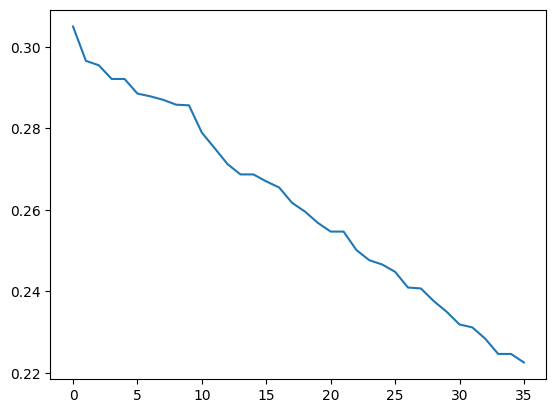

In [53]:
plt.plot(gen_fitnesses)

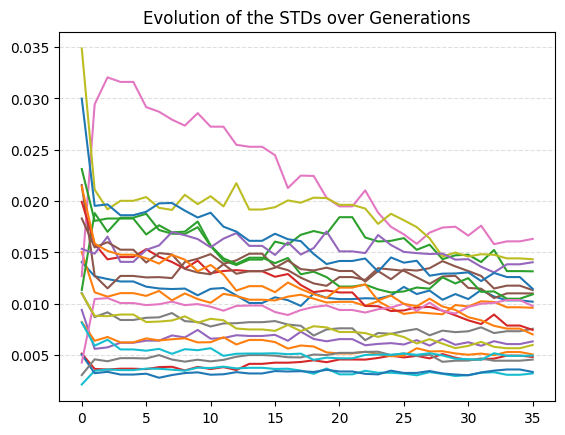

In [34]:
for i in range(np.array(gen_stds).shape[1]):
    plt.plot(np.array(gen_stds)[:, i], label=f"std {i+1}")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.title("Evolution of the STDs over Generations");

In [ ]:
time_string = re.sub(r'[-:.]', '_', datetime.datetime.now().isoformat())

In [ ]:
pickle.dump(
    {
        "gen_stds": gen_stds,
        "gen_fitnesses": gen_fitnesses,
        "early_stopping": early_stopping,
        "logging": logging,
        "X_train": X_train,
        "y_train": y_train,
        "X_test": X_test,
        "y_test": y_test,
        "model": model,
        "total_time": total_time,
        "metadata": {
            "N_POP": N_POP,
            "N_SAMPLE": N_SAMPLE,
            "N_GEN": N_GEN,
            "INIT_MUTATION_RATE": INIT_MUTATION_RATE,
            "INIT_STD": INIT_STD,
            "P_ELITE": P_ELITE,
            "P_COMBINE": P_COMBINE,
            "DRIFT_THRESHOLD": DRIFT_THRESHOLD,
            "DRIFT_CONFIDENCE": DRIFT_CONFIDENCE,
            "EARLY_STOPPING_PATIENCE": EARLY_STOPPING_PATIENCE,
        }
    },
    open(f"./evolution_results_{time_string}.pkl", "wb")
)

---

In [47]:
gen_stds

[array([0.12695697, 0.11395963, 0.05389103, 0.11594966, 0.10815822,
        0.10508547, 0.1155814 , 0.09476165]),
 array([0.12722905, 0.12765579, 0.10002017, 0.11443474, 0.11818801,
        0.09937126, 0.1270481 , 0.08417233]),
 array([0.11723566, 0.13498499, 0.0878895 , 0.12323355, 0.1140302 ,
        0.10372395, 0.12869934, 0.08433384]),
 array([0.1296684 , 0.1226171 , 0.08475534, 0.11758915, 0.12399161,
        0.10871101, 0.13470356, 0.08565443]),
 array([0.12849243, 0.12750038, 0.08439393, 0.12145197, 0.12205369,
        0.10709423, 0.12564928, 0.09922512]),
 array([0.13616651, 0.12857992, 0.09492153, 0.12334652, 0.12357815,
        0.10508193, 0.12203045, 0.09630539]),
 array([0.13935145, 0.12902371, 0.09248389, 0.12274032, 0.13051295,
        0.10360081, 0.13465986, 0.0978272 ]),
 array([0.14397675, 0.1270358 , 0.09751769, 0.13075666, 0.14242855,
        0.10478549, 0.12039648, 0.10239123]),
 array([0.12977041, 0.13133754, 0.09353048, 0.1315597 , 0.14160967,
        0.11051711, 

In [48]:
early_stopping.best_stds

array([0.12695697, 0.11395963, 0.05389103, 0.11594966, 0.10815822,
       0.10508547, 0.1155814 , 0.09476165])

In [49]:
eval_individual = Individual(
    data=X_test_scaled.copy(),
    mutation_rate=1.0,
    mutation_stds=early_stopping.best_stds
)

eval_individual.mutate(
    X_min=X_min,
    X_max=X_max,
    X_cat=X_cat
)

In [50]:
eval_explanations = produce_explanations(
    explainer,
    eval_individual.data
)

In [51]:
eval_prediction = model.predict(eval_individual.data)
reference_prediction = model.predict(X_test_scaled)

correct_prediction = (eval_prediction == reference_prediction)

n_correct_predictions = correct_prediction.sum()

In [64]:
x = np.arange(len(X.columns))
bar_width = 0.3

fig, axes = plt.subplots(n_correct_predictions, 1, figsize=(10, 6*n_correct_predictions))
    
for i, ax in enumerate(axes.flatten()):
    ax.bar(
        x=x - bar_width/2,
        height=reference_explanations[correct_prediction][i],
        width=bar_width,
        color='blue',
        alpha=0.8,
        label='Reference'
    )

    ax.bar(
        x=x + bar_width/2,
        height=eval_explanations[correct_prediction][i],
        width=bar_width,
        color='red',
        alpha=0.8,
        label='Mutation'
    )

    ax.legend()
    
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # show mutation std under each x-tick, rotated vertically
    ymin, ymax = ax.get_ylim()
    pad = (ymax - ymin) * 0.15
    # extend lower ylim to make room for the text
    ax.set_ylim(ymin - pad, ymax)

    for xi, s in enumerate(early_stopping.best_stds):
        ax.text(
            x[xi],
            ymin - pad * 0.35,
            f"{s:.4f}",
            ha='center',
            va='center',
            rotation=90,
            fontsize=9,
            color='black'
        )

    # replace default tick labels with alternating-height labels to avoid overlap
    ax.set_xticks(x)
    ax.set_xticklabels([])

    # positions in axis coordinates (0..1) for alternating label heights below the axis
    y_top = -0.02
    y_bottom = -0.06

    for j, name in enumerate(df.columns[:-1]):
        y = y_top if j % 2 == 0 else y_bottom
        ax.text(
            x[j],
            y,
            name,
            ha='center',
            va='top',
            rotation=0,
            transform=ax.get_xaxis_transform(),
            fontsize=9
        )

    ax.set_title(
        fr"SHAP Explanations for $\tilde{{X}}_{{\boldsymbol{{\sigma}}}}$[{i}] where "
        fr"$\min_{{\boldsymbol{{\sigma}}}} \|\boldsymbol{{\sigma}}\| \text{{ s.t. }} "
        fr"\mathbb{{P}}(\mathcal{{Drift}}(\tilde{{X}}_{{\boldsymbol{{\sigma}}}}) "
        fr"\geq {DRIFT_THRESHOLD:.2f}) \geq {DRIFT_CONFIDENCE:.2f}$",
        fontsize=14
    )
    ax.set_ylabel("SHAP Value")
    ax.set_xlabel(
        "Features\n(Applied mutation standard deviations $\\sigma_f$ shown above names)",
    )
    ax.xaxis.set_label_coords(0.5, -0.12)

    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.subplots_adjust(hspace=0.4, bottom=0.14, top=1.05)

---